In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as skm

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have NaN in 2 columns, 'Age' and 'Cabin'!

Let's begin by getting Dummy values for 'Sex'. 

Also get rid of the 'Ticket' Number - too irregular and generally random

In [7]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = df.drop('Ticket', axis=1)

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,0


# Data Preprocessing

## Get an idea of correlations

<AxesSubplot: xlabel='Survived', ylabel='Count'>

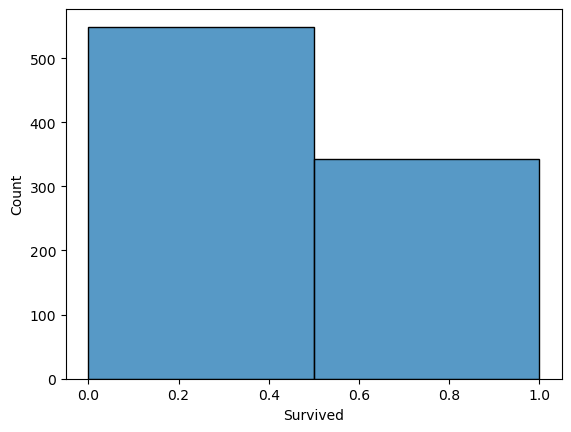

In [9]:
sns.histplot(df, x='Survived', bins=2)

<AxesSubplot: >

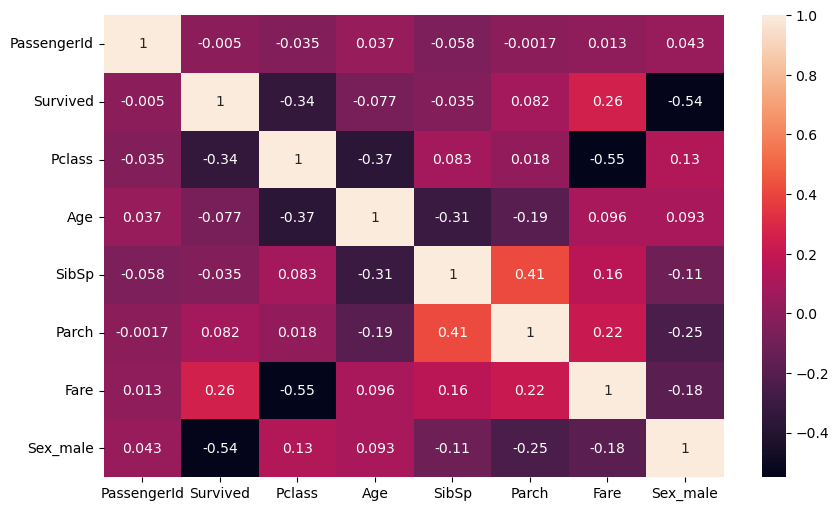

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

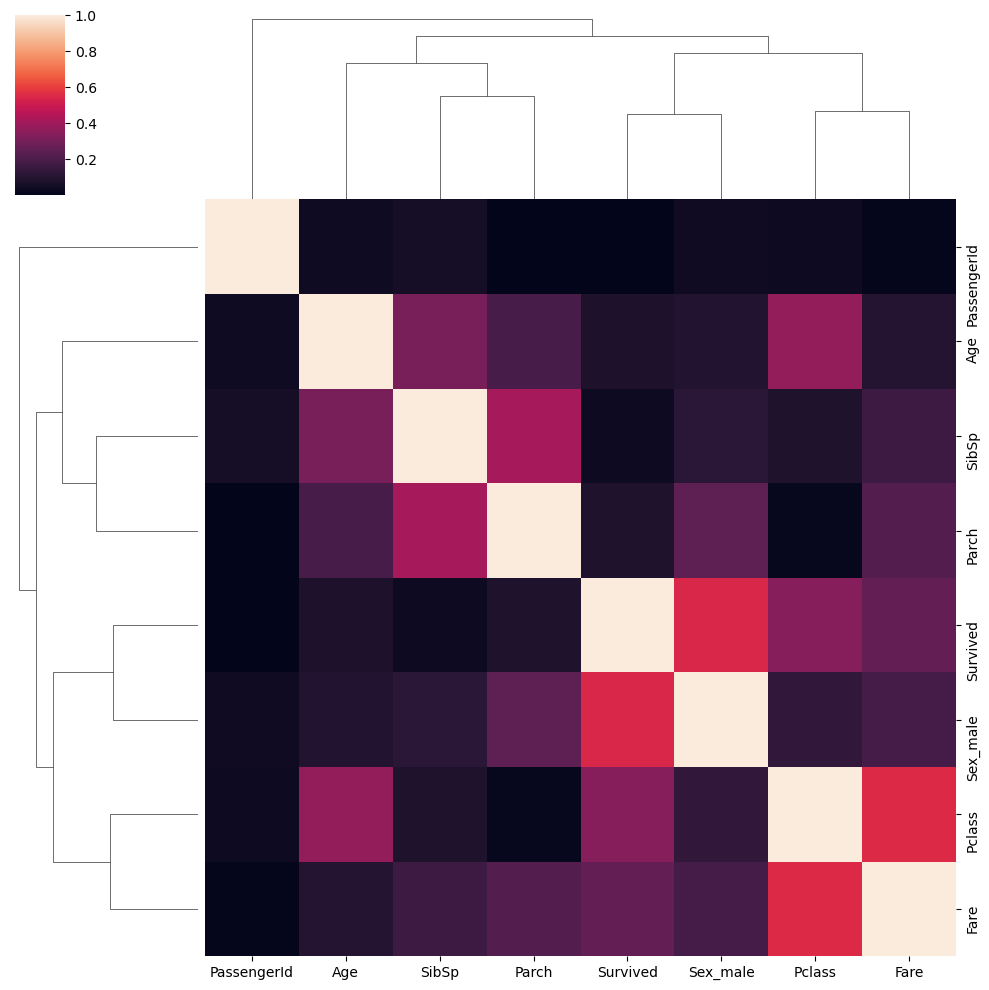

In [11]:
sns.clustermap(df.corr(numeric_only=True).abs())

In [12]:
df.corr(numeric_only=True)['Survived'].sort_values()

Sex_male      -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [13]:
df.corr(numeric_only=True)['PassengerId'].sort_values()

SibSp         -0.057527
Pclass        -0.035144
Survived      -0.005007
Parch         -0.001652
Fare           0.012658
Age            0.036847
Sex_male       0.042939
PassengerId    1.000000
Name: PassengerId, dtype: float64

In [14]:
df.corr(numeric_only=True)['Pclass'].sort_values()

Fare          -0.549500
Age           -0.369226
Survived      -0.338481
PassengerId   -0.035144
Parch          0.018443
SibSp          0.083081
Sex_male       0.131900
Pclass         1.000000
Name: Pclass, dtype: float64

### Observations: 

- Survival rate mostly correlated (-0.54) with Gender, with females more likely to survive (inversely coellated with 'Sex_male')
-  'Fare' (0.26) and 'Pclass' (inversely, -0.34)
- Those two are inversely correlated as well (-0.55)
- 'PassengerId' irrelevant, probably randomly assigned

Makes sense, "Women and Children(?) first"! Although we see not so much the Children in the Data... explore 'Age' later.
Next, the better class tickets are obviously more expensive and the 1st class were probably the first onto lifeboats while 3rd class had to hold onto doors etc...

Let's keep both 'Fare' and 'Pclass' (even though correlation of 0.54 is quite high), and remove 'PassengerId'

<AxesSubplot: xlabel='Sex_male', ylabel='count'>

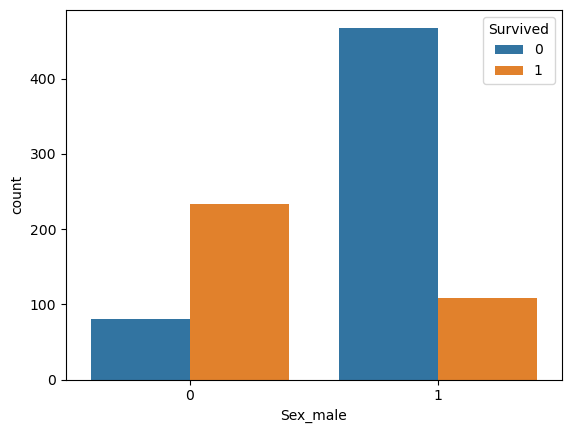

In [15]:
sns.countplot(df, x='Sex_male', hue='Survived')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

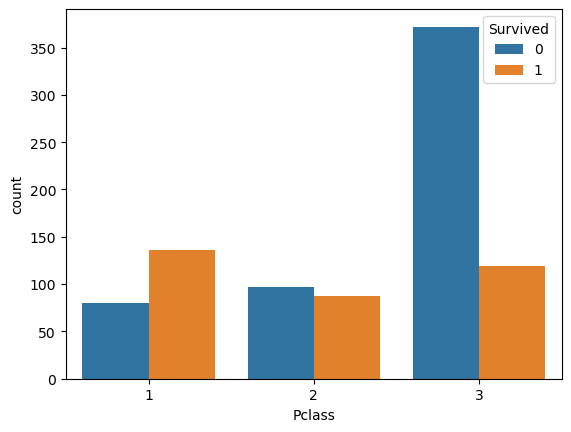

In [16]:
sns.countplot(df, x='Pclass', hue='Survived')

<AxesSubplot: xlabel='Fare', ylabel='Count'>

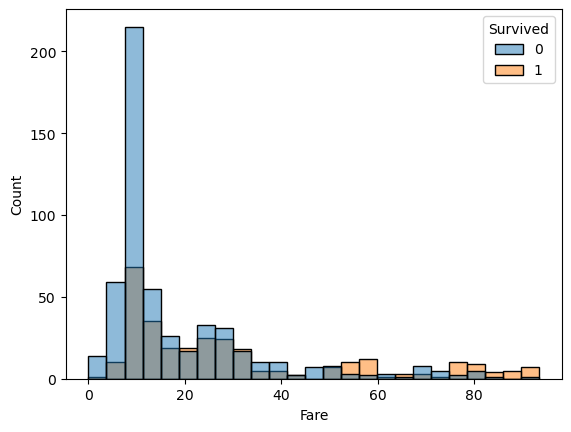

In [17]:
sns.histplot(df[df['Fare']<100], x='Fare', hue='Survived', bins=25)

In [18]:
df = df.drop(columns='PassengerId')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
 9   Sex_male  891 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 63.6+ KB


In [20]:
df.corr(numeric_only=True)['Survived'].abs().sort_values(ascending=False)

Survived    1.000000
Sex_male    0.543351
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

## Age 
Age seems surprisingly unimportant so far... Let's explore this!

<AxesSubplot: xlabel='Age', ylabel='Count'>

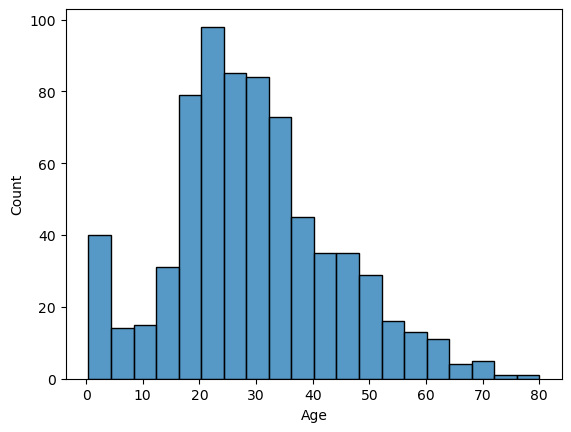

In [21]:
sns.histplot(df, x='Age')

<AxesSubplot: xlabel='Age', ylabel='Count'>

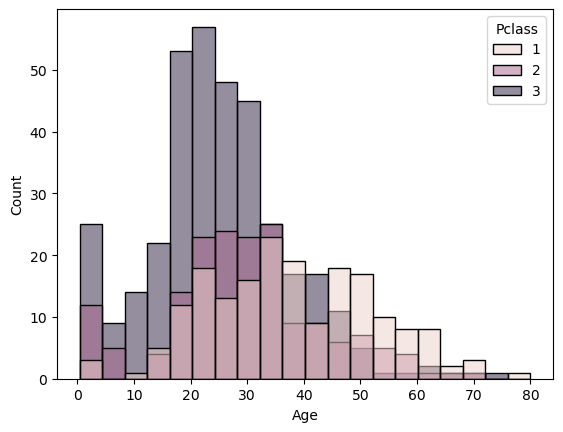

In [22]:
sns.histplot(df, x='Age', hue='Pclass')

Most young people were in 3rd class! 

<AxesSubplot: xlabel='Age', ylabel='Count'>

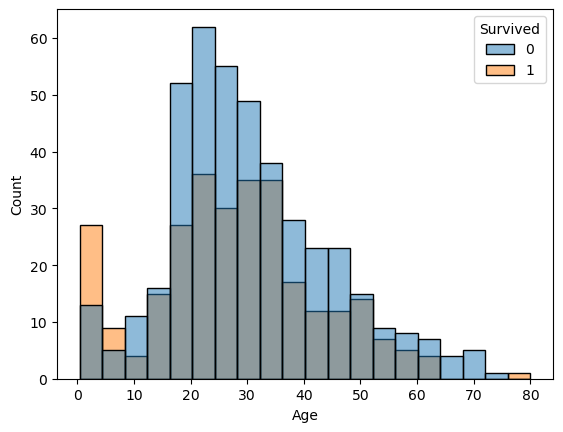

In [23]:
sns.histplot(df, x='Age', hue='Survived')

Actually, looks like most little Children survived! :)

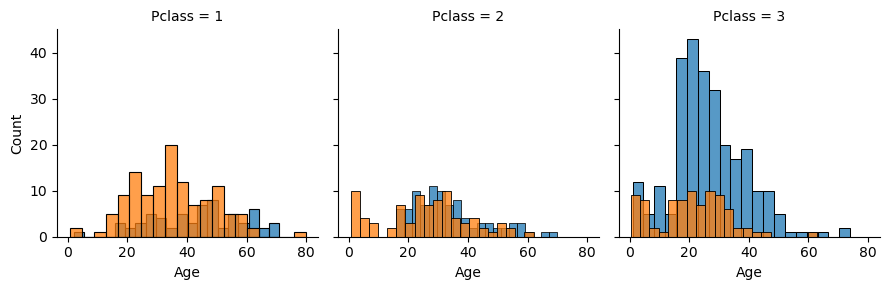

In [24]:
sns.FacetGrid(df, col='Pclass', hue='Survived').map(sns.histplot, 'Age', bins=20)

Although most Childern were in 3rd class, only half of those survived while pretty much all of the 2nd class children survived :()

'Age' (at least being very young) makes a big difference, so 'Age' stays!

Can we make the dependence more precise?
Look at survival rates in Age brackets:

[0.68, 0.39285714285714285, 0.3333333333333333, 0.38333333333333336, 0.45925925925925926, 0.36619718309859156, 0.4, 0.4166666666666667, 0.3, 0.0, 0.0]


<AxesSubplot: >

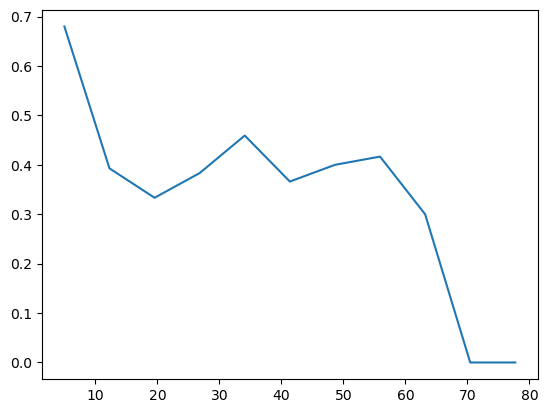

In [25]:
survival_rates_age = []
bins = 11
delta = df['Age'].max()/bins

for n in range(1,bins+1):
    srate = df[(df.Age<(delta*n)) & (df.Age>(delta*n-delta)) & (df.Survived==1)]['Survived'].count() / df[(df.Age<(delta*n)) & (df.Age>(delta*n-delta))]['Survived'].count()
    survival_rates_age.append(srate)
    
print(survival_rates_age)

sns.lineplot(y=survival_rates_age, x=np.arange(5,df['Age'].max()+5,delta))

Young children have a higher chance of survival, old people lower. Makes sense!



This means we will have to figure out what to do with the missing values...

In [26]:
df[df['Age'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  177 non-null    int64  
 1   Pclass    177 non-null    int64  
 2   Name      177 non-null    object 
 3   Age       0 non-null      float64
 4   SibSp     177 non-null    int64  
 5   Parch     177 non-null    int64  
 6   Fare      177 non-null    float64
 7   Cabin     19 non-null     object 
 8   Embarked  177 non-null    object 
 9   Sex_male  177 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 14.0+ KB


Can't use the Cabin Number to get info about Spouses/Children.

Perhaps through 'SibSp' and 'Parch'?

In [27]:
print(df[df['Age'].isna()].SibSp.value_counts())
print(df[df['Age'].isna()].Parch.value_counts())

0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64
0    157
2     12
1      8
Name: Parch, dtype: int64


Insignificant amount have either...

Perhaps the Names contain some information? The title - Miss, Mrs, Mr.? 

Start by finding out the common titles in the group with mising Age, then find average Age in those groups.

In [28]:
df.loc[df['Age'].isna(), 'Name'].str.split().str.get(1).unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'y', 'Dr.', 'Melkebeke,'],
      dtype=object)

In [29]:
df.loc[df['Name'].str.contains('Mr.', regex=False),'Age'].describe()

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
df.loc[df['Name'].str.contains('Mrs.', regex=False),'Age'].describe()

count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [31]:
df.loc[df['Name'].str.contains('Miss.', regex=False),'Age'].describe()

count    146.000000
mean      21.773973
std       12.990292
min        0.750000
25%       14.125000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [32]:
df.loc[df['Name'].str.contains('Master', regex=False),'Age'].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [33]:
df.loc[df['Name'].str.contains('Dr.', regex=False),'Age'].describe()

count     6.000000
mean     42.000000
std      12.016655
min      23.000000
25%      35.000000
50%      46.500000
75%      49.750000
max      54.000000
Name: Age, dtype: float64

In [34]:
mr_mean = df.loc[df['Name'].str.contains('Mr.', regex=False),'Age'].mean()
mrs_mean = df.loc[df['Name'].str.contains('Mrs.', regex=False),'Age'].mean()
miss_mean = df.loc[df['Name'].str.contains('Miss.', regex=False),'Age'].mean()
master_mean = df.loc[df['Name'].str.contains('Master', regex=False),'Age'].mean()
dr_mean = df.loc[df['Name'].str.contains('Dr.', regex=False),'Age'].mean()

That seems to work quite well! At least we can distinguesh the Children/yong people from Adults, as 'Miss.' is generally younger girls than 'Mrs.', and 'Master' are boys below 12.

Now we backfill the guesses for the Age to complete our data.

In [35]:
mr_mask = df['Name'].str.contains('Mr.', regex=False)
mrs_mask = df['Name'].str.contains('Mrs.', regex=False)
miss_mask = df['Name'].str.contains('Miss.', regex=False)
master_mask = df['Name'].str.contains('Master', regex=False)
dr_mask = df['Name'].str.contains('Dr.', regex=False)

In [36]:
df.loc[df['Age'].isna() & mr_mask, 'Age'] = mr_mean
df.loc[df['Age'].isna() & mrs_mask, 'Age'] = mrs_mean
df.loc[df['Age'].isna() & miss_mask, 'Age'] = miss_mean
df.loc[df['Age'].isna() & master_mask, 'Age'] = master_mean
df.loc[df['Age'].isna() & dr_mask, 'Age'] = dr_mean

In [37]:
df[df['Age'].isna()].count()

Survived    0
Pclass      0
Name        0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Sex_male    0
dtype: int64

Now let's also engineer new columns, with three classes of ages: 0-10, 10-60, 60+

In [38]:
print(df[(df["Age"]<=10)].Age.count())
print(df[(df["Age"]>10)&(df["Age"]<=60)].Age.count())
print(df[(df["Age"]>60)].Age.count())

68
801
22


In [39]:
srate_child = df[(df.Age<=10) & (df.Survived==1)]['Survived'].count() / df[(df.Age<=10)]['Survived'].count()
srate_adult = df[(df.Age<=60) & (df.Age>10) & (df.Survived==1)]['Survived'].count() / df[(df.Age<=60) & (df.Age>10)]['Survived'].count()
srate_old = df[(df.Age>60) & (df.Survived==1)]['Survived'].count() / df[(df.Age>60)]['Survived'].count()

print("Child: ", srate_child, "\nAdult: ", srate_adult, "\nOld: ", srate_old)

Child:  0.5882352941176471 
Adult:  0.3707865168539326 
Old:  0.22727272727272727


In [40]:
df.loc[df.Age<=10, "Age_Bracket"] = "0-10"
df.loc[(df.Age>10)&(df.Age<=60), "Age_Bracket"] = "11-60"
df.loc[(df.Age>60), "Age_Bracket"] = "61+"
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_male,Age_Bracket
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,1,11-60
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,0,11-60
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,0,11-60
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,0,11-60
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,1,11-60


In [41]:
df = pd.get_dummies(df, columns=['Age_Bracket'], drop_first=True)

## Embarked

It shouldn't matter where the passengers embarked, but let's see.

In [42]:
df.Embarked.isna().sum()

2

<AxesSubplot: xlabel='Embarked', ylabel='count'>

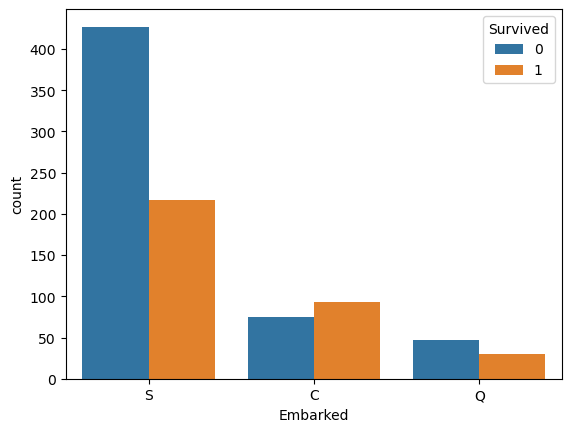

In [43]:
sns.countplot(df, x='Embarked', hue='Survived')

/home/max/anaconda3/envs/notbase/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


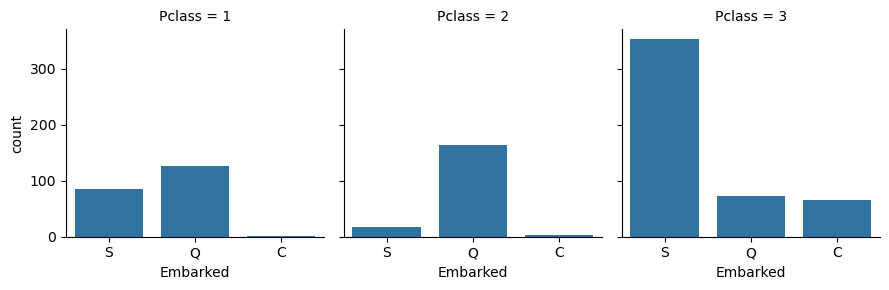

In [44]:
sns.FacetGrid(df, col='Pclass').map(sns.countplot, 'Embarked')

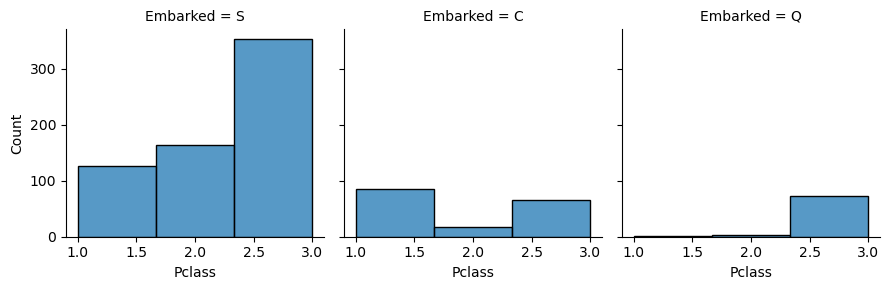

In [45]:
sns.FacetGrid(df, col='Embarked').map(sns.histplot, 'Pclass', bins=3)

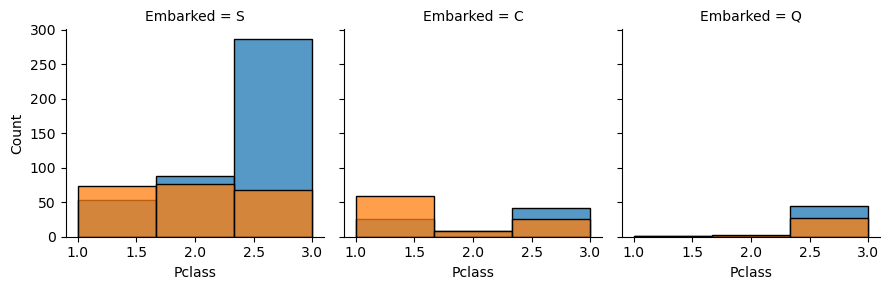

In [46]:
sns.FacetGrid(df, col='Embarked', hue='Survived').map(sns.histplot, 'Pclass', bins=3)

In fact unusually many embarking in 'C' have survived! However this can better be explained by the class distribution, where more 1st class passengers than 2nd/3rd class embarked in 'C' while the opposite is true for the other stations.
Let's remove this column.

In [47]:
df = df.drop('Embarked', axis=1)

## Siblings/Spouses and Parents/Children

<AxesSubplot: xlabel='SibSp', ylabel='count'>

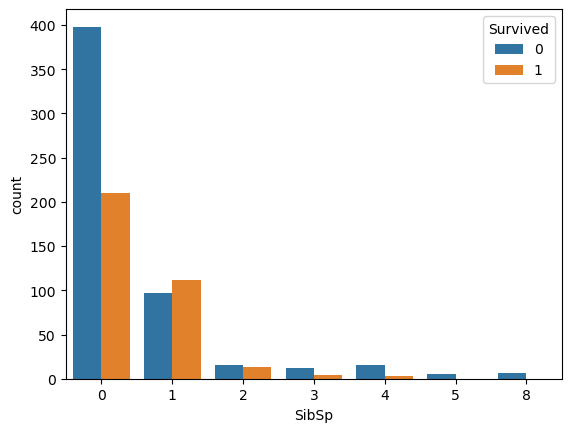

In [48]:
sns.countplot(df, x='SibSp', hue='Survived')

<AxesSubplot: xlabel='SibSp', ylabel='count'>

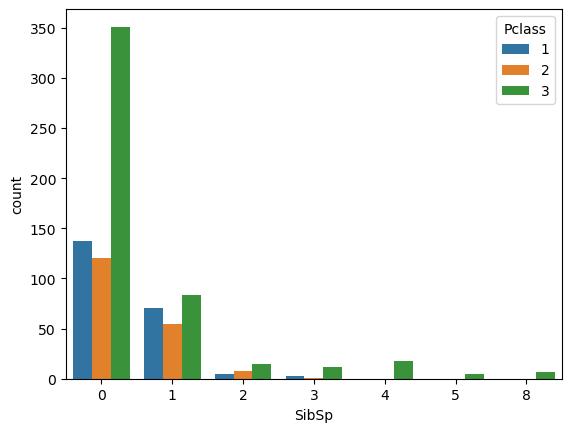

In [49]:
sns.countplot(df, x='SibSp', hue='Pclass')

<AxesSubplot: xlabel='Parch', ylabel='count'>

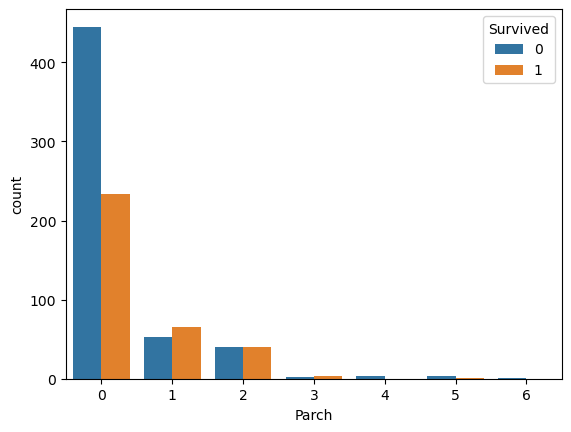

In [50]:
sns.countplot(df, x='Parch', hue='Survived')

<AxesSubplot: xlabel='Parch', ylabel='count'>

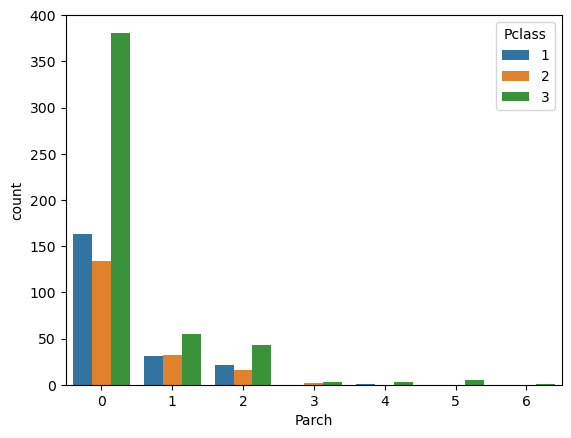

In [51]:
sns.countplot(df, x='Parch', hue='Pclass')

### Being alone seems to make a difference!

Change to yes/no categories.

<AxesSubplot: xlabel='Parch', ylabel='Count'>

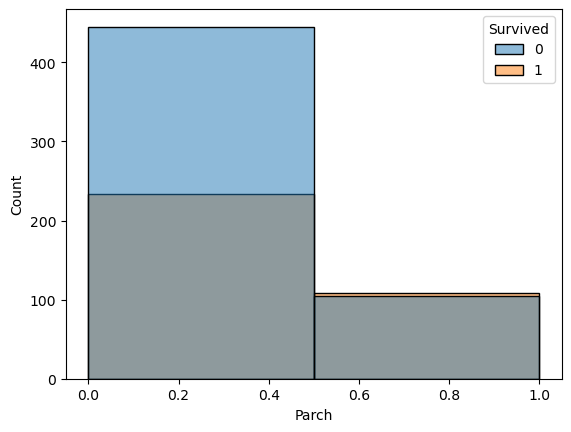

In [52]:
df['Parch'] = df['Parch'].apply(lambda x: int(bool(x)))
df['SibSp'] = df['SibSp'].apply(lambda x: int(bool(x)))
sns.histplot(df,x='Parch', hue='Survived', bins=2)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Name               891 non-null    object 
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Cabin              204 non-null    object 
 8   Sex_male           891 non-null    uint8  
 9   Age_Bracket_11-60  891 non-null    uint8  
 10  Age_Bracket_61+    891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB


## Fare

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

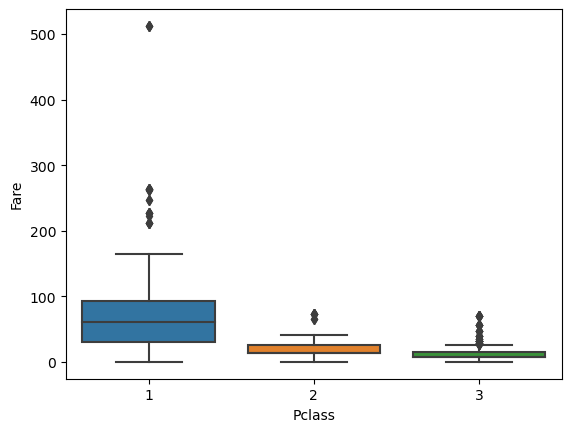

In [54]:
sns.boxplot(df, y='Fare', x='Pclass')

Only one big outlier, let's assume the fares are correct.

<AxesSubplot: xlabel='Fare', ylabel='Count'>

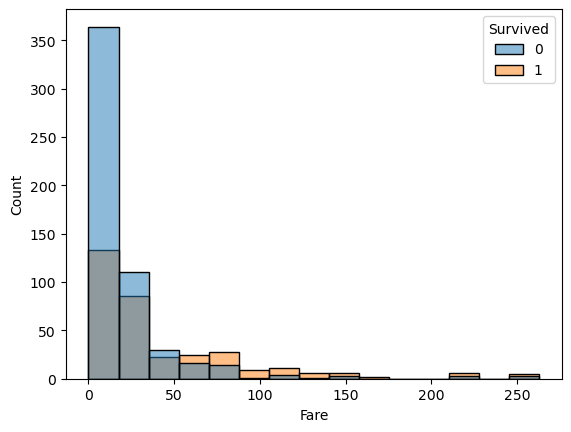

In [55]:
sns.histplot(df[(df.Fare<400)], x='Fare', hue='Survived', bins=15)

They are also relevant, so we'll keep the fare in place.

## Deal with Cabins

Are they important? Lower decks may have much lower chance of survival? Maybe worth extra work?

In [56]:
with_cabins = df[df.notna().all(axis=1)]

In [57]:
with_cabins['cabin_letter'] = with_cabins['Cabin'].str.get(0)

/tmp/ipykernel_174225/2213079845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_cabins['cabin_letter'] = with_cabins['Cabin'].str.get(0)


In [58]:
with_cabins.cabin_letter.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_letter, dtype: int64

<AxesSubplot: xlabel='cabin_letter', ylabel='count'>

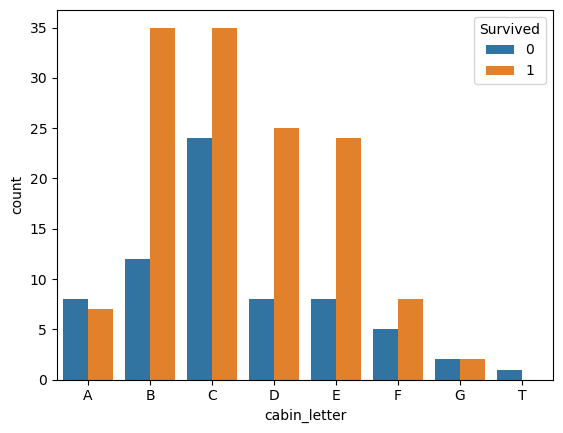

In [59]:
sns.countplot(with_cabins, x='cabin_letter', order=str.split('A B C D E F G T'), hue='Survived')

In [60]:
(with_cabins[with_cabins['Survived']==1].value_counts('cabin_letter') / with_cabins.value_counts('cabin_letter'))

cabin_letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T         NaN
dtype: float64

Pretty strong survival rate among the different cabin prefixes! 
Can we explain this already from other data?

<AxesSubplot: xlabel='cabin_letter', ylabel='Fare'>

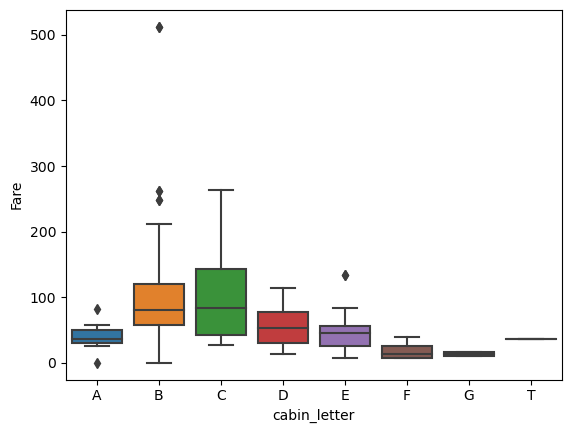

In [61]:
sns.boxplot(with_cabins, x='cabin_letter', order=str.split('A B C D E F G T'), y='Fare')

<AxesSubplot: xlabel='cabin_letter', ylabel='count'>

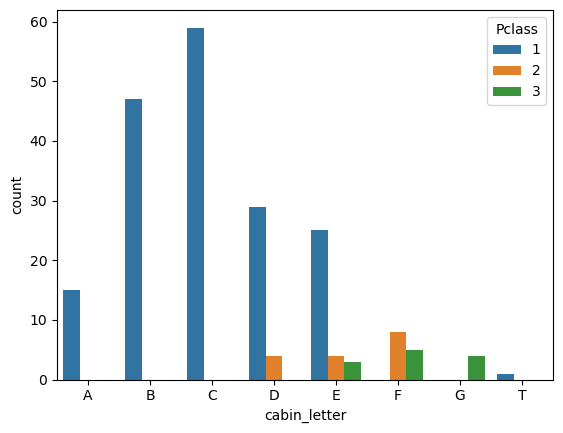

In [62]:
sns.countplot(with_cabins, x='cabin_letter', order=str.split('A B C D E F G T'), hue='Pclass')

The Cabins with the higher survival rate are also those with a higher fare and 1st class cabins! This explains the difference in survival rate, and we can remove the mostly missing column.

In [63]:
df = df.drop('Cabin', axis=1)

In [64]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Age_Bracket_11-60,Age_Bracket_61+
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,1,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Name               891 non-null    object 
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Fare               891 non-null    float64
 7   Sex_male           891 non-null    uint8  
 8   Age_Bracket_11-60  891 non-null    uint8  
 9   Age_Bracket_61+    891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 51.5+ KB


## Can we do anything with the Names?

Try to extract the titles, similar to 'Age' engineering

In [66]:
df.loc[mr_mask, 'Title'] = 'Mr.'
df.loc[mrs_mask, 'Title'] = 'Mrs.'
df.loc[miss_mask, 'Title'] = 'Miss.'
df.loc[master_mask, 'Title'] = 'Master'
df.loc[dr_mask, 'Title'] = 'Dr.'

In [67]:
df.isna().sum()

Survived              0
Pclass                0
Name                  0
Age                   0
SibSp                 0
Parch                 0
Fare                  0
Sex_male              0
Age_Bracket_11-60     0
Age_Bracket_61+       0
Title                20
dtype: int64

<AxesSubplot: xlabel='Title', ylabel='count'>

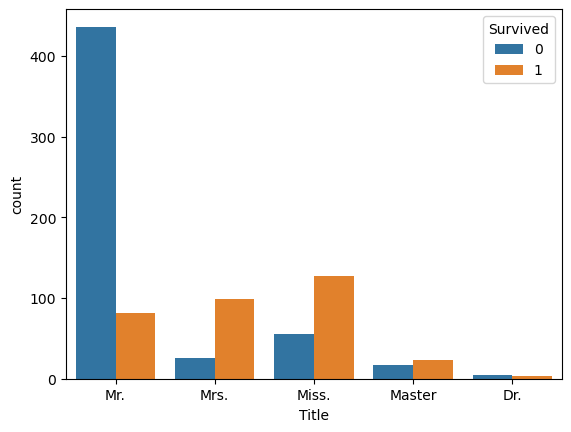

In [68]:
sns.countplot(df, x='Title', hue='Survived')

Looks like a huge impact, but can be simply explained by Age and Gender:
- "Mr." are middle aged and older men, the least likely group to survive.
- "Mrs." are middle aged women, fairly likely to survive.
- "Miss." are younger women, more likely to survive.
- "Master" are only very young boys, and Children had a good chance.

In [69]:
df = df.drop(['Title', 'Name'], axis=1)

In [70]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Age_Bracket_11-60,Age_Bracket_61+
0,0,3,22.0,1,0,7.2500,1,1,0
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Age                891 non-null    float64
 3   SibSp              891 non-null    int64  
 4   Parch              891 non-null    int64  
 5   Fare               891 non-null    float64
 6   Sex_male           891 non-null    uint8  
 7   Age_Bracket_11-60  891 non-null    uint8  
 8   Age_Bracket_61+    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [72]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Age_Bracket_11-60,Age_Bracket_61+
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754659,0.317621,0.239057,32.204208,0.647587,0.898990,0.024691
std,0.486592,0.836071,13.277179,0.465813,0.426747,49.693429,0.477990,0.301511,0.155270
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.773973,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.000000
75%,1.000000,3.000000,35.898148,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,1.000000,1.000000,512.329200,1.000000,1.000000,1.000000


# Data preprocessing pipeline

Now we make sure that the Test data will be treated the same! 

Recall our steps: 
- Get dummy-variable for Gender
- Spouses/Siblings and Parents/Children: Turn into yes/no 
- Fill in Age by extracting the title from the Name, and enter mean age of training(!) set
- NOTE: There will be others that cannot be filled this way. For those, enter overall mean Age.
- Remove 'Ticket', 'PassengerId', 'Embarked', 'Cabin', 'Name'

In [73]:
age_mean = df['Age'].mean()

In [74]:
def data_pipe(df):
    # Dummy for Gender
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
    
    # Turn into 1 or 0
    df['Parch'] = df['Parch'].apply(lambda x: int(bool(x)))
    df['SibSp'] = df['SibSp'].apply(lambda x: int(bool(x)))
    
    # Fill in missing Age data
    df.loc[df['Age'].isna() & mr_mask, 'Age'] = mr_mean
    df.loc[df['Age'].isna() & mrs_mask, 'Age'] = mrs_mean
    df.loc[df['Age'].isna() & miss_mask, 'Age'] = miss_mean
    df.loc[df['Age'].isna() & master_mask, 'Age'] = master_mean
    df.loc[df['Age'].isna() & dr_mask, 'Age'] = dr_mean
    df.loc[df['Age'].isna() & ~mr_mask & ~mrs_mask & ~miss_mask & ~master_mask & ~dr_mask, 'Age'] = age_mean
    
    # Add new columns for age brackets
    df.loc[df.Age<=10, "Age_Bracket"] = "0-10"
    df.loc[(df.Age>10)&(df.Age<=60), "Age_Bracket"] = "11-60"
    df.loc[(df.Age>60), "Age_Bracket"] = "61+"
    df = pd.get_dummies(df, columns=['Age_Bracket'], drop_first=True)
    
    # Remove columns we don't need
    df = df.drop(['Ticket', 'PassengerId', 'Embarked', 'Cabin', 'Name'], axis=1)
    
    return df

In [75]:
data_pipe( pd.read_csv('train.csv',nrows=100)).compare(df.head(100) )

Empty DataFrame
Columns: []
Index: []

# The Model

Split training data to verify learning method. Then train again with all the data, before preparing submission data.

## Let's start with a brute force NN

In [365]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Age_Bracket_11-60,Age_Bracket_61+
0,0,3,22.0,1,0,7.2500,1,1,0
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0


In [366]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [367]:
X = df.drop(['Survived'], axis=1)
y = df['Survived'].values

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [391]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [392]:
X_train.shape

(712, 8)

In [393]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [394]:
model = Sequential()

model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [395]:
model.fit(x=X_train, y=y_train, 
          epochs=600, 
          validation_data=(X_test,y_test),
          verbose=0, 
          callbacks=[earlystop, TqdmCallback(verbose=1)],
         )

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Restoring model weights from the end of the best epoch: 169.
Epoch 194: early stopping


<AxesSubplot: >

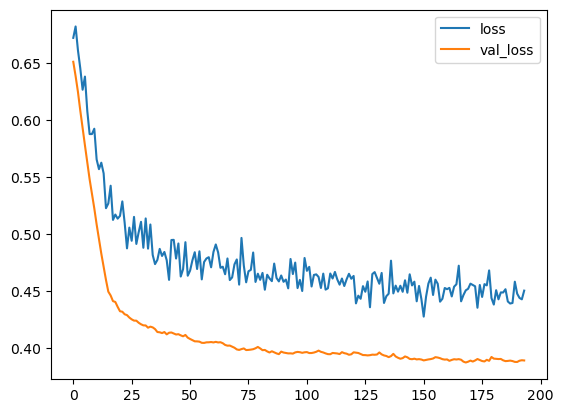

In [396]:
losses = pd.DataFrame( model.history.history)
losses.plot()

In [397]:
predictions = (model.predict(X_test)>0.5).astype('int32')
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       114
           1       0.82      0.72      0.77        65

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[104  10]
 [ 18  47]]


In [398]:
accuracy_score(y_test, predictions)

0.8435754189944135

In [399]:
predictions = (model.predict(X_scaled)>0.5).astype('int32')
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       549
           1       0.86      0.65      0.74       342

    accuracy                           0.82       891
   macro avg       0.83      0.79      0.80       891
weighted avg       0.83      0.82      0.82       891

[[512  37]
 [119 223]]


In [400]:
accuracy_score(y, predictions)

0.8249158249158249

~80% accuracy, not bad so far. Let's keep trying...

## Decision tree

In [307]:
from sklearn.tree import DecisionTreeClassifier

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [309]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [310]:
predictions = dtree.predict(X_test)

In [311]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       133
           1       0.71      0.70      0.70        90

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



### Is a Random Forest better?

In [312]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [313]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [314]:
rfc_pred = rfc.predict(X_test)

In [315]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       133
           1       0.78      0.71      0.74        90

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



Randomly excellent rf_classifyer, 97% - save it to pickle!
Probably overtrained though...

In [316]:
from joblib import dump
# dump(rfc, 'awesomeRFClassifier.joblib') 

In [317]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Logistic Regression

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [319]:
log_model = make_pipeline(StandardScaler(), LogisticRegression())

In [320]:
log_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [321]:
predictions = log_model.predict(X_test)

In [322]:
print(skm.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       133
           1       0.84      0.72      0.78        90

    accuracy                           0.83       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [323]:
log_model.score(X_test, y_test)

0.8340807174887892

In [324]:
log_model.score(X, y)

0.8035914702581369

# Determine which works best

Run a loop of 50 random train/test splits, take the average f1 score.

## Neural Net

In [347]:
from sklearn.metrics import f1_score

In [348]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [349]:
model = Sequential()

model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [350]:
f1_ml = []
score_ml = []

for n in range(15):
    print('n = ', n)

    model = Sequential()

    model.add(Dense(units=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=6, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam')

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(x=X_train, y=y_train, 
              epochs=600, 
              validation_data=(X_test,y_test),
              verbose=0, 
              callbacks=[earlystop, TqdmCallback(verbose=0)],
             )
    
    predictions = (model.predict(X_test)>0.5).astype('int32')
    f1_ml.append(f1_score(y_test, predictions))
    score_ml.append(accuracy_score(y_test, predictions))
    
    #print(classification_report(y_test, predictions))

n =  0


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 292.
Epoch 317: early stopping
n =  1


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 53.
Epoch 78: early stopping
n =  2


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 324.
Epoch 349: early stopping
n =  3


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 125.
Epoch 150: early stopping
n =  4


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 135.
Epoch 160: early stopping
n =  5


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 422.
Epoch 447: early stopping
n =  6


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 250.
Epoch 275: early stopping
n =  7


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 73.
Epoch 98: early stopping
n =  8


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 139.
Epoch 164: early stopping
n =  9


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 393.
Epoch 418: early stopping
n =  10


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 80.
Epoch 105: early stopping
n =  11


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 247.
Epoch 272: early stopping
n =  12


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 65.
Epoch 90: early stopping
n =  13


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 208.
Epoch 233: early stopping
n =  14


0epoch [00:00, ?epoch/s]

Restoring model weights from the end of the best epoch: 111.
Epoch 136: early stopping


In [351]:
pd.Series(f1_ml).describe()

count    15.000000
mean      0.721538
std       0.051390
min       0.642336
25%       0.683014
50%       0.719512
75%       0.757600
max       0.826667
dtype: float64

In [356]:
pd.Series(score_ml).describe()

count    15.000000
mean      0.810164
std       0.033242
min       0.753363
25%       0.784753
50%       0.811659
75%       0.822870
max       0.883408
dtype: float64

## Decision Tree

In [352]:
f1_dt = []
score_dt = []

for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)

    predictions = dtree.predict(X_test)
    
    f1_dt.append(f1_score(y_test, predictions))
    score_dt.append(log_model.score(X_test, y_test))

# pd.Series(f1_dt).describe()
pd.Series(score_dt).describe()

count    50.000000
mean      0.802601
std       0.024166
min       0.748879
25%       0.784753
50%       0.800448
75%       0.816143
max       0.869955
dtype: float64

## Random Forest

In [353]:
f1_rf = []
score_rf = []

for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)

    predictions = rfc.predict(X_test)
    
    f1_rf.append(f1_score(y_test, predictions))
    score_rf.append(log_model.score(X_test, y_test))

# pd.Series(f1_rf).describe()
pd.Series(score_rf).describe()

count    50.000000
mean      0.804215
std       0.020908
min       0.766816
25%       0.789238
50%       0.802691
75%       0.811659
max       0.856502
dtype: float64

## Logistic Regression

In [354]:
f1_log = []
score_log = []

for n in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    log_model = make_pipeline(StandardScaler(), LogisticRegression())
    log_model.fit(X_train, y_train)

    predictions = log_model.predict(X_test)
    
    f1_log.append(f1_score(y_test, predictions))
    score_log.append(log_model.score(X_test, y_test))

# pd.Series(f1_log).describe()
pd.Series(score_log).describe()

count    50.000000
mean      0.792735
std       0.025372
min       0.730942
25%       0.775785
50%       0.795964
75%       0.807175
max       0.860987
dtype: float64

# Winner: Random Forest

Can we tune Random Forest parameters even better?

In [357]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Begin with Randmized hyperpearameter search to find good area

In [359]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2500, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [500, 722, 944, 1166, 1388, 1611, 1833, 2055, 2277, 2500],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [360]:
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 3, verbose=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 722, 944, 1166,
                                                         1388, 1611, 1833, 2055,
                                                         2277, 2500]})

In [361]:
rf_random.best_params_

{'n_estimators': 1611,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': True}

In [362]:
predictions = rf_random.best_estimator_.predict(X_test)
f1_score(y_test, predictions)

0.670807453416149

In [363]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
f1_score(y_test, predictions)

0.6424242424242423

In [364]:
rf_best_fit_1 = rf_random.best_params_
rf_best_fit_1

{'n_estimators': 1611,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': True}

### Now optimize with grid search

In [307]:
param_grid = {
    'n_estimators': [1000, 1500, 2000, 2500],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30],
    'bootstrap': [True]
}

In [308]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)

In [309]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [5],
                         'n_estimators': [1000, 1500, 2000, 2500]},
             verbose=2)

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2500; total time=   5.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2500; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1500; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, ma

In [310]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1500}

In [363]:
param_grid = {
    'n_estimators': [1300],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'bootstrap': [True]
}
rfc = RandomForestClassifier()
grid_search_fine = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)
grid_search_fine.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [5], 'n_estimators': [1300]})

In [364]:
grid_search_fine.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1300}

In [369]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
f1_score(y_test, predictions)

0.7272727272727272

In [370]:
predictions = grid_search_fine.best_estimator_.predict(X_test)
f1_score(y_test, predictions)

0.8819875776397516

In [371]:
grid_search_fine.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Use best RFC to predict test dataset

In [433]:
best_rfc = grid_search_fine.best_estimator_

In [434]:
best_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [435]:
best_rfc.fit(X,y)

print(classification_report(y, best_rfc.predict(X)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       549
           1       0.94      0.86      0.90       342

    accuracy                           0.92       891
   macro avg       0.93      0.91      0.92       891
weighted avg       0.92      0.92      0.92       891



Looking good!

Now: Prepare test data with data pipeline, predict, and go!

In [436]:
test_data_0 = pd.read_csv('test.csv')
test_data = data_pipe(test_data_0)
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [437]:
test_data.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        1
Sex_male    0
dtype: int64

We have another missing datapoint in Fare! Let's see the culprit

In [438]:
test_data[test_data['Fare'].isna()]

,Pclass,Age,SibSp,Parch,Fare,Sex_male
152,3,60.5,0,0,NaN,1


Fill in the median Fare of Pclass=3

In [439]:
df.loc[df['Pclass']==3,'Fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

In [440]:
df.loc[df['Pclass']==3,'Fare'].median()

8.05

In [441]:
test_data.loc[test_data['Fare'].isna(),'Fare'] = df.loc[df['Pclass']==3,'Fare'].median()

In [442]:
test_data.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

Nice job! Now we can apply our Classifier.

In [443]:
test_predictions = best_rfc.predict(test_data)

Sanity check: does the result make any sense?

In [444]:
print(len(test_predictions))
print(test_data.shape)

418
(418, 6)


In [445]:
pd.Series(test_predictions).describe()

count    418.000000
mean       0.325359
std        0.469070
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
dtype: float64

In [446]:
pd.Series(y).describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
dtype: float64

The mean and variance look similar enough to the test data. Looks fine!

Now just save and ready to submit!

In [449]:
submission = pd.DataFrame(data={'PassengerId':test_data_0.PassengerId, 'Survived':test_predictions})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [448]:
submission.to_csv('titanic_submission.csv', index=False)